# Introducción

## Descripción del problema

En una clínica hay tareas que son rutinarias y automatizables y otras que no. La gente que va a una clínica llega con distintos problemas a resolver, con distintos grados de urgencia.

Nosotres en mi equipo de la empresa [Kunan](https://www.kunan.com.ar/) pensamos una solución para las tareas de urgencia baja y que tienen gran potencial de automatización, con el espíritu de que eso libere la carga a personas de tener trabajos repetitivos, para que estas personas se puedan enfocar en los casos más urgentes o que necesiten expertise humano.

Un trabajo repetitivo que se presenta en un entorno clínica es el de atender a pedidos por

- **sacar un turno** para un médico de una especialidad, en una sede, en un horario.
- **consultar los turnos** vigentes que un paciente tiene.
- **cancelar un turno** vigente

Nosotres ofrecemos como producto un chatbot, o asistente conversacional, que usa Machine Learning para poder mantener una conversación y realizar acciones. Además de ocuparse de esas tres tareas principales, se le agregan
- poder pasar a hablar con un humano (lo que nosotres llamamos **handoff**)
- responder **preguntas frecuentes** (¿dónde queda la clínica? ¿qué horarios de atención tienen? ¿qué médicos hay?)

La funcionalidad de handoff es muy importante ya que una de las características innatas de los modelos de Machine Learning es que pueden fallar. Un fallo en un bot conversacional se ve como: no entender la **intención** detrás de una expresión del usuarie, no poder reconocer y extraer correctamente **entidades** (como lo son nombres de personas, dnis, teléfonos, especialidades médicas, etc), o perder el hilo de una conversación. Para que en estos casos la persona usuaria tenga una forma de suplir la necesidad que la llevó a hablar con el bot, ofrecemos una integración con un sistema de mensajería directo con operadores humanos.

En la mayoría de las clínicas la gente realiza estas acciones enlistadas hablando con une secretarie directamente, a través de Whatsapp, o usando una interfaz gráfica de la página web de la clínica. Pensar en términos de interfaces gráficas como la de un sitio web es algo con un poco más de tradición dentro del desarrollo de productos de software, sobre todo en comparación a las interfaces conversacionales. Whatsapp tiene, especialmente en latinomérica, gran adopción por parte de las personas, que están acostumbradas a usarlo como una interfaz conversacional para el acceso a múltiples servicios.

Un asistente conversacional ofrece una interfaz textual conversacional para la toma de acciones. En vez de apretar botones las personas van guiando a un chatbot a través de opciones en formularios. 

Este producto tiene ese desafío doble: ser un producto de NLP en español y ser un producto de Datos en la industria.

## Motivación

Cada persona al relacionarse con un producto de software trae consigo su universo de saberes, sus necesidades y sus costumbres, que decantarán en su percepción sobre qué cosas son "fáciles" de hacer con un software y qué cosas serán  "complicadas".

En las interfaces conversacionales se abre una puerta más de saberes y exigencias pre-existentes en las personas usuarias: la del lenguaje. Los lenguajes humanos están inscriptos a geografías, son maleables y dinámicos, [entre otras características](https://es.wikipedia.org/wiki/Lengua_natural) 


## Descripción del dataset

El dataset con el que trabajaremos este práctico consta de 21k filas. Corresponde a conversaciones reales de pacientes con el bot, con datos recolectados por el canal de comunicación de Whatsapp, con datos que corresponden desde diciembre de 2021 hasta marzo del 2022. Tiene mensajes de cada conversación, tanto emitidos por el bot como por el usuario y taggeados correspondientemente.

- **From_anon**: Número de teléfono emisor del mensaje. (Anonimizado)
- **To_anon**: Número de teléfono receptor del mensaje.(Anonimizado)
- **Hospital**: Nombre del hospital.
- **Tel_hospital**: Teléfono del hospital.
- **Body**: Cuerpo del mensaje.
- **Status**: Indica si el mensaje se recibió/leyó.
- **SentDate**: Año, mes, día, hora, minutos y segundos en el que se envió el mensaje.
- **Fecha**: Año, mes y día formato: aaaa-mm-dd
- **Dia**: día del mes
- **Hora**: hora del mensaje (hh)
- **Messages**: Siempre vale 1. Columna creada para utilizar agrupaciones.
- **Direction**: Dirección del mensaje ya sea de entrada (inbound) o salida (outbound-api).
A estas columnas se le agregan varias que que surgen de analizar mensajes del bot:
- **Appointment_msp**: Mensaje de turno confirmado con la especialidad solicitada.
- **Appointment**: valor dicotómico 1 indica que sacó turno y 0 que no.
- **Cancellation_msp**: Mensaje de turno cancelado que contiene la especialidad cancelada.
- **Cancelled**: valor dicotómico 1 indica que canceló efectivamente el turno y 0 que no se canceló.
- **Consult**: valor dicotómico 1 indica que se consultaron los turnos y 0 que no se consultaron
- **Consult_Appoint**: cuerpo del mensaje sobre la consulta realizada.
- **Fail_HH**: valor dicotómico donde 1 indica que no se solicitó HH y no se logró la comunicación.  
- **Got_HH**: valor dicotómico donde 1 indica que la persona solicitó y logró contactarse con HH.
- **No_correlation**:  valor dicotómico donde 1 indica que el bot detectó que la persona preguntó algo que no tenía que ver con las funcionalidades del bot.
- **not_DNI**: valor dicotómico donde 1 indica que el paciente proveyó un DNI que no estaba registrado como cliente de esa clínica
- **Error_Interno** : valor dicotómico donde 1 indica que hubo un error interno del bot
- **Error_501** : valor dicotómico donde 1 indica que hubo un error en los sistemas clínicos con los cuales el bot está integrado
- **Has_Cupo**: valor dicotómico donde 1 indica que el médico seleccionado no tiene cupo de turnos para una obra social.
- **Ask_Kunan**: valor dicotómico donde 1 indica que el bot menciona quien es kunan. Esto sirve para ver como funcionan los intent del bot.
- **Falla_Api_externo**:valor dicotómico donde 1 indica que se encontró un error de falla de api externo.
- **Many_Fallbacks_Goto_HH**: valor dicotómico donde 1 indica que el bot tuvo varios problemas de entendimiento y detectó la necesidad de pasar automáticamente a un humano.

### Cargando el dataset

In [23]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/kunan-sa/mentoria_2022/master/efm_anon.csv")
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])


### Viendo un par de ejemplos

In [24]:
df.sample(3)

,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,alta_dni,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,From_anon,To_anon
5894,CityBell,whatsapp:+5492215137770,*Escribe el número de la opción* que quieres e...,read,2022-02-16 14:56:17+00:00,2022-02-16,16,2,14,1,...,[],0,[],0,[],0,[],0,1725,1635
1284,Salud Consultorios,whatsapp:+5493515266230,1,received,2022-01-03 15:48:12+00:00,2022-01-03,3,1,15,1,...,[],0,[],0,[],0,[],0,2580,2122
8334,Carra,whatsapp:+5493515266217,"Hola, soy el asistente virtual de Clinica Carr...",read,2022-02-16 11:51:48+00:00,2022-02-16,16,2,11,1,...,[],0,[],0,[],0,[],0,3463,3295


### Características del dataset

Cantidad de datos

In [25]:
len(df)

21000

Columnas

In [26]:
print(len(df.columns))
df.columns

41


Index(['Hospital', 'Tel_hospital', 'Body', 'Status', 'SentDate', 'Fecha',
       'Dia', 'Mes', 'Hora', 'Messages', 'Direction', 'Appointment_msp',
       'Appointment', 'Cancellation_msp', 'Cancelled', 'consult',
       'Consult_Appoint', 'fail_HH_sms', 'Fail_HH', 'achieve_HH', 'Got_HH',
       'Cupo', 'Full_turnos_obra_social', 'No_Relation', 'No_Correlation',
       'has_error', 'Error_Interno', 'has_error_501', 'Error_501',
       'falla_api_externo', 'Falla_Api_Externo', 'alta_dni', 'not_DNI',
       'issue_name', 'Issue_Name', 'ask_kunan', 'Ask_Kunan',
       'many_fallbacks_goto_hh', 'Many_Fallbacks_Goto_HH', 'From_anon',
       'To_anon'],
      dtype='object')

In [27]:
df.describe()

,Dia,Mes,Hora,Messages,Appointment,Cancelled,Consult_Appoint,Fail_HH,Got_HH,Full_turnos_obra_social,No_Correlation,Error_Interno,Error_501,Falla_Api_Externo,not_DNI,Issue_Name,Ask_Kunan,Many_Fallbacks_Goto_HH,From_anon,To_anon
count,21000.000000,21000.000000,21000.000000,21000.0,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,8.766905,2.339571,14.902476,1.0,0.012429,0.002762,0.002524,0.004286,0.005619,0.004429,0.001857,0.000571,0.002476,0.00019,0.008190,0.001524,0.000095,0.002381,2929.046571,2909.619524
std,7.413395,0.644018,3.342678,0.0,0.110791,0.052482,0.050175,0.065326,0.074751,0.066402,0.043056,0.023898,0.049701,0.01380,0.090132,0.039007,0.009759,0.048738,1638.239791,1658.363620
min,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,2.000000,12.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1725.000000,1665.000000
50%,3.000000,2.000000,15.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2624.000000,2520.000000
75%,16.000000,3.000000,17.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3750.000000,3999.250000
max,28.000000,3.000000,23.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,7478.000000,7182.000000


## Leyendo una conversación

Ordenando por From_anon y por SentDate se puede seguir el hilo de una conversación

In [28]:
# Conversaciones de una sola persona random
df[(df["From_anon"]==4048) | (df["To_anon"]==4048)][['From_anon', 'To_anon', 'Direction', 'Body']]#.sort_values(by="SentDate")

,From_anon,To_anon,Direction,Body
6240,4048,3360,inbound,Buenas tardes necesito turno para Odontología
6268,4048,3360,inbound,Si
6270,4048,3360,inbound,XXXXXXXXXXXXX
6273,4048,3360,inbound,XXXXXXXX
6275,4048,3360,inbound,Odontólogo
6277,4048,3360,inbound,0
6279,4048,3360,inbound,Hola buenas tardes necesito turno para la odon...
6283,4048,3360,inbound,Odontología
6306,4048,3360,inbound,Si
6310,4048,3360,inbound,XXXXXXXXXXXXX


### Obteniendo datos de enero

In [29]:
enero = df[df["Mes"] == 1]
print(len(enero))
enero.sample(3)

2000


,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,alta_dni,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,From_anon,To_anon
697,Carra,whatsapp:+5493515266217,Quedaron guardados tus datos.,read,2022-01-03 18:02:03+00:00,2022-01-03,3,1,18,1,...,[],0,[],0,[],0,[],0,2249,2916
1151,Carra,whatsapp:+5493515266217,No,received,2022-01-03 16:14:00+00:00,2022-01-03,3,1,16,1,...,[],0,[],0,[],0,[],0,3355,2121
957,Carra,whatsapp:+5493515266217,"Hola, soy el asistente virtual de Clinica Carr...",read,2022-01-03 17:03:55+00:00,2022-01-03,3,1,17,1,...,[],0,[],0,[],0,[],0,2249,3553


### Datos de enero que son de pacientes

In [30]:
enero_inbound = enero[enero["Direction"]=="inbound"]
print(len(enero_inbound))
enero_inbound.sample(4)

829


,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,alta_dni,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,From_anon,To_anon
1844,Salud Consultorios,whatsapp:+5493515266230,2,received,2022-01-03 14:00:46+00:00,2022-01-03,3,1,14,1,...,[],0,[],0,[],0,[],0,2791,2122
1094,Carra,whatsapp:+5493515266217,8066,received,2022-01-03 16:30:49+00:00,2022-01-03,3,1,16,1,...,[],0,[],0,[],0,[],0,3113,2121
728,Carra,whatsapp:+5493515266217,XXXXXXXXXX,received,2022-01-03 17:56:04+00:00,2022-01-03,3,1,17,1,...,[],0,[],0,[],0,[],0,3205,2121
533,Los Cedros,whatsapp:+5491120401203,Ayuda,received,2022-01-03 18:31:49+00:00,2022-01-03,3,1,18,1,...,[],0,[],0,[],0,[],0,303,10


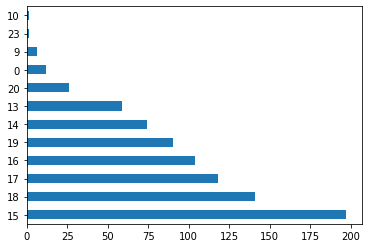

In [31]:
enero_inbound["Hora"].value_counts().plot(kind='barh')

# Ejercicios propuestos

## Ejercicio 1: Descripción del dataset
- Describa el dataset con sus propias palabras.  ¿Cuáles son los tipos de datos que hay en el dataset? ¿Hay columnas derivadas de otras? ¿Encuentra dificultades a priori para entender alguna de las columnas del dataset? Qué tipos de datos hay en el dataset? 
- ¿Cuántos y cuáles son los hospitales que se encuentran en el dataset? ¿Están los mismos hospitales a lo largo del tiempo? 

Argumente sus respuestas con ejemplos concretos y gráficos en lo posible.

## Descripción del Dataset

### Sobre las columnas
A partir de la descripción sobre las columnas provista en la introducción podemos clasificar las columnas del dataset en 

* Metadatos sobre el mensaje: `from_anon` y `to_anon` indican los teléfonos involucrados en la conversación, mientras que `direction` informa el sentido del mensaje (entrante / saliente). `status` brinda información sobre si el mensaje ha sido leido.

* Datos temporales. La columna `SentDate` contiene la información temporal del mensaje, mientras que las columnas `Fecha`, `Dia`, `Mes`, `Hora` son columnas derivadas

* Información sobre la interacción: ¿Se consultaron turnos? ¿Se asignó un turno? ¿Se canceló el turno asignado?

* Información sobre la plataforma: Las columnas `Falla_Api_externo`, `Error_Interno` y `Error_501` nos permiten analizar ciertos atributos cualitativos sobre el funcionamiento del bot.

* Información sobre el bot: Podemos analizar la performance del bot (refiriendonos al porcentaje de casos en que se resuelve la interacción sin pasar a un humano) mediante las columnas `No_Correlation`, `Ask_kunan`  y `Many_Fallbacks_Goto_HH` 

In [32]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn


In [35]:

df['Cupo'].value_counts()

df[ df['Cupo'] != '[]'].Hospital.value_counts()


CityBell      45
Carra         31
Los Cedros    17
Name: Hospital, dtype: int64

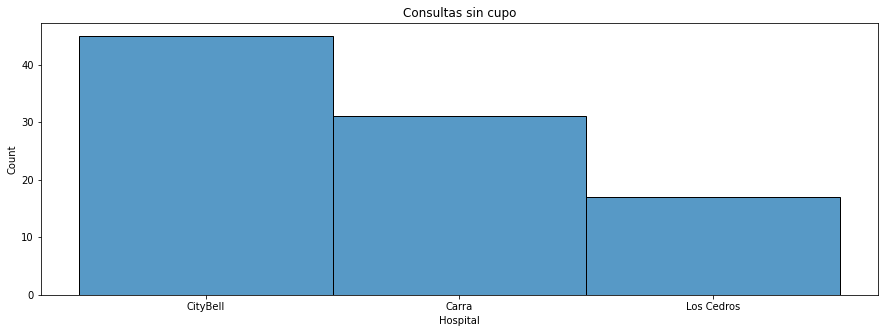

In [36]:
fig = plt.figure(figsize=(15, 5))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Consultas sin cupo')

sin_cupo = df[ df['Cupo'] != '[]']
seaborn.histplot(data=sin_cupo, x='Hospital')

### Hospitales en el año

In [37]:
df_hospital_por_mes = df.groupby(['Hospital', 'Mes'])['Messages'].count()
df_hospital_por_mes

Hospital            Mes
Carra               1      1255
                    2      2294
                    3      2311
CityBell            1        22
                    2      5159
                    3      4741
Desarrollo          2         2
Los Cedros          1       180
                    2       785
                    3       894
Salud Consultorios  1       543
                    2      1602
                    3      1175
Santa Fe            2        27
                    3        10
Name: Messages, dtype: int64

In [38]:
# Efectividd del bot
len(df[df['No_Correlation'] == 0]) / len(df)

0.9981428571428571

In [39]:
df.Direction.value_counts()

outbound-api    12346
inbound          8654
Name: Direction, dtype: int64

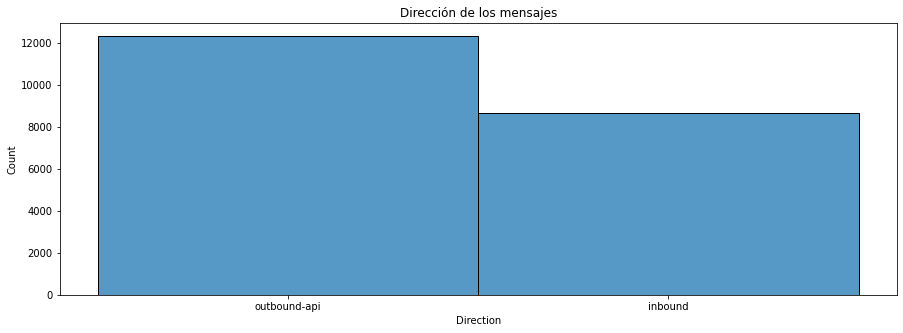

In [42]:
fig = plt.figure(figsize=(15, 5))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Dirección de los mensajes')

seaborn.histplot(data=df, x='Direction')

In [43]:
# Cuantos mensajes de pacientes

inbound = df.Direction == 'inbound'
msg_pacientes = df[inbound]
msg_bot = df[~inbound]

# cantidad promedio de mensaje de bot por paciente
len(msg_bot) / len(msg_pacientes)

1.4266235266928589

In [44]:
msg_pacientes.sample(5)

,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,alta_dni,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,From_anon,To_anon
18092,CityBell,whatsapp:+5492215137770,8131.0,received,2022-03-02 16:36:10+00:00,2022-03-02,2,3,16,1,...,[],0,[],0,[],0,[],0,2533,2519
2,Carra,whatsapp:+5493515266217,Si,received,2022-01-02 20:42:10+00:00,2022-01-02,2,1,20,1,...,[],0,[],0,[],0,[],0,3356,2121
15241,Carra,whatsapp:+5493515266217,1.0,received,2022-03-02 19:28:10+00:00,2022-03-02,2,3,19,1,...,[],0,[],0,[],0,[],0,7072,4855
19436,CityBell,whatsapp:+5492215137770,XXXXXXXXX,received,2022-03-02 15:42:04+00:00,2022-03-02,2,3,15,1,...,[],0,[],0,[],0,[],0,1744,2519
8594,Salud Consultorios,whatsapp:+5493515266230,XXXXXXXXXXXXX,received,2022-02-16 11:37:39+00:00,2022-02-16,16,2,11,1,...,[],0,[],0,[],0,[],0,3754,3360


## Errores

In [87]:
df_errores = df[(df['Error_Interno'] == 1) | (df ['Error_501'] == 1 )| (df ['Falla_Api_Externo'] == 1) | (df.Fail_HH == 1) | (df.Many_Fallbacks_Goto_HH == 1) | (df.fail_HH_sms == 1)]

In [86]:
len(df_errores)

208

In [57]:
df[df.Falla_Api_Externo == 1].Body.unique()[0]

'Hubo un error, intentá más tarde.'

In [58]:
df[df.Error_501 == 1].Body.unique()[0]

'Por el momento *el sistema de gestión de turnos no está disponible, intente más tarde.* \n👉🏻 Para comunicarte con un representante humano, escribe *_hablar con humano_*. \nSi es una urgencia, por favor comunicate al teléfono o acudí de forma presencial al centro de salud. \nDisculpe las molestias ocasionadas.'

In [59]:
df[df.Error_Interno == 1].Body.unique()[0]

'⚠️  Error interno. Cerrá y volvé a abrir la aplicación, o comunicate con soporte técnico.⚠️'

In [64]:
df [df.Fail_HH == 1].Body.unique()[0]

'Estamos fuera del horario de atención con operadores humanos.'

In [82]:
df[df.Many_Fallbacks_Goto_HH == 1].Body.unique()

array(['Disculpe, el asistente virtual de Clinica Carra está teniendo problemas entendiendo qué quiere decir.  \n Lo hemos transferido con un operador humano de Clinica Carra. Por favor, ingresá tu consulta.',
       'Disculpe, el asistente virtual de Clinica Los Cedros está teniendo problemas entendiendo qué quiere decir.  \n Lo hemos transferido con un operador humano de Clinica Los Cedros. Por favor, ingresá tu consulta.',
       'Disculpe, el asistente virtual de Centro Medico de Diagnostico City Bell está teniendo problemas entendiendo qué quiere decir.  \n Lo hemos transferido con un operador humano de Centro Medico de Diagnostico City Bell. Por favor, ingresá tu consulta.',
       'Disculpe, el asistente virtual de Salud Consultorios está teniendo problemas entendiendo qué quiere decir.  \n Lo hemos transferido con un operador humano de Salud Consultorios. Por favor, ingresá tu consulta.'],
      dtype=object)

## Ejercicio 2: Exploración
- Explorando el dataset, puede reconocer a priori "clases/categorías de datos"? Por dar un ejemplo: mensajes del bot y mensajes de clientes. Por dar otro ejemplo: Mensajes durante la mañana y mensajes durante la tarde. Intente reconocer al menos tres categorías y a partir de estas responder para cada una: ¿está representada esta categoría de forma balanceada en el dataset? Para argumentar su respuesta realice un gráfico que muestre la distribución de esta clase. ¿Qué hipótesis puede generar a partir de estas observaciones? ¿Qué consecuencias a nivel investigación puede tener si esta clase reconocida tiene esa distribución en el dataset?    

## Hospitales

### ¿Qué hospitales se encuentran en el dataset?

In [33]:
df['Hospital'].value_counts()

CityBell              9922
Carra                 5860
Salud Consultorios    3320
Los Cedros            1859
Santa Fe                37
Desarrollo               2
Name: Hospital, dtype: int64

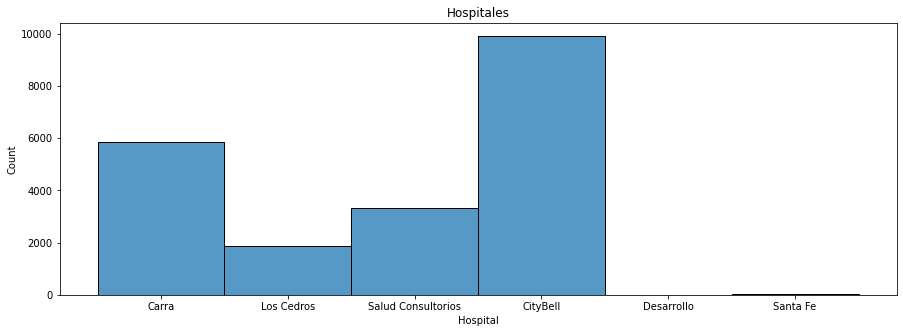

In [34]:
fig = plt.figure(figsize=(15, 5))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Hospitales')
seaborn.histplot(data=df['Hospital'])

### Campos con errores
Se pueden identificar mensajes de error en la interacción con los usuarios. En esta categoría podemos incluir tanto a los errores técnicos de la plataforma (o un proveedor), o los errores del bot (no siendo capaz de reconocer mensajes, o pasar a un operador humano)

In [128]:
df_errores = df[(df['Error_Interno'] == 1) | (df ['Error_501'] == 1 )| (df ['Falla_Api_Externo'] == 1) | (df.Fail_HH == 1) | (df.Many_Fallbacks_Goto_HH == 1) | (df.fail_HH_sms == 1)]
len(df_errores)

208

In [94]:
df[df.Falla_Api_Externo == 1].Body.unique()[0]

'Hubo un error, intentá más tarde.'

In [129]:
df[df.Error_501 == 1].Body.unique()[0]

'Por el momento *el sistema de gestión de turnos no está disponible, intente más tarde.* \n👉🏻 Para comunicarte con un representante humano, escribe *_hablar con humano_*. \nSi es una urgencia, por favor comunicate al teléfono o acudí de forma presencial al centro de salud. \nDisculpe las molestias ocasionadas.'

In [96]:
df[df.Error_Interno == 1].Body.unique()[0]

'⚠️  Error interno. Cerrá y volvé a abrir la aplicación, o comunicate con soporte técnico.⚠️'

In [97]:
df [df.Fail_HH == 1].Body.unique()[0]

'Estamos fuera del horario de atención con operadores humanos.'

In [98]:
df[df.Many_Fallbacks_Goto_HH == 1].Body.unique()

array(['Disculpe, el asistente virtual de Clinica Carra está teniendo problemas entendiendo qué quiere decir.  \n Lo hemos transferido con un operador humano de Clinica Carra. Por favor, ingresá tu consulta.',
       'Disculpe, el asistente virtual de Clinica Los Cedros está teniendo problemas entendiendo qué quiere decir.  \n Lo hemos transferido con un operador humano de Clinica Los Cedros. Por favor, ingresá tu consulta.',
       'Disculpe, el asistente virtual de Centro Medico de Diagnostico City Bell está teniendo problemas entendiendo qué quiere decir.  \n Lo hemos transferido con un operador humano de Centro Medico de Diagnostico City Bell. Por favor, ingresá tu consulta.',
       'Disculpe, el asistente virtual de Salud Consultorios está teniendo problemas entendiendo qué quiere decir.  \n Lo hemos transferido con un operador humano de Salud Consultorios. Por favor, ingresá tu consulta.'],
      dtype=object)

### Turnos por especialidad

Podemos obtener la especialidad a partir del mensaje de asignación de turno

In [ ]:
def get_especialidad(body):
  l = body.split(' ')[4:]
  idx = l.index('ha')
  return ' '.join(l[:idx]).title()

df['Especialidad'] = df[df.Appointment == 1].Body.apply(get_especialidad)

df.Especialidad.unique()

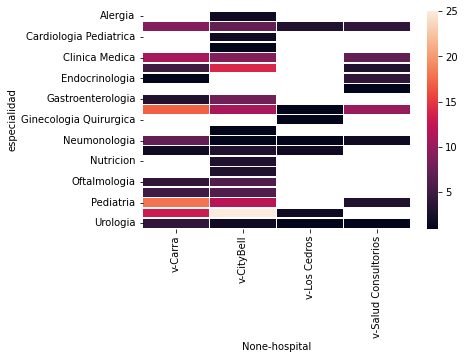

In [47]:
esp = df[df.Appointment == 1].groupby(['Especialidad', 'Hospital'])[['Especialidad', 'Hospital']]
gs = esp.groups

hospitales = []
especialidades = []
valor = []
for especialidad, hospital in gs:
  
  cant = len(gs[especialidad, hospital])

  hospitales.append(hospital)
  especialidades.append(especialidad)
  valor.append(cant)

vmax, vmin = max(valor), min(valor)
gg = pd.DataFrame({'especialidad': especialidades, 'hospital': hospitales, 'v': valor})

ss = gg.pivot('especialidad', 'hospital')

seaborn.heatmap(data = ss, linewidths=0.5, vmax= vmax, vmin = vmin)

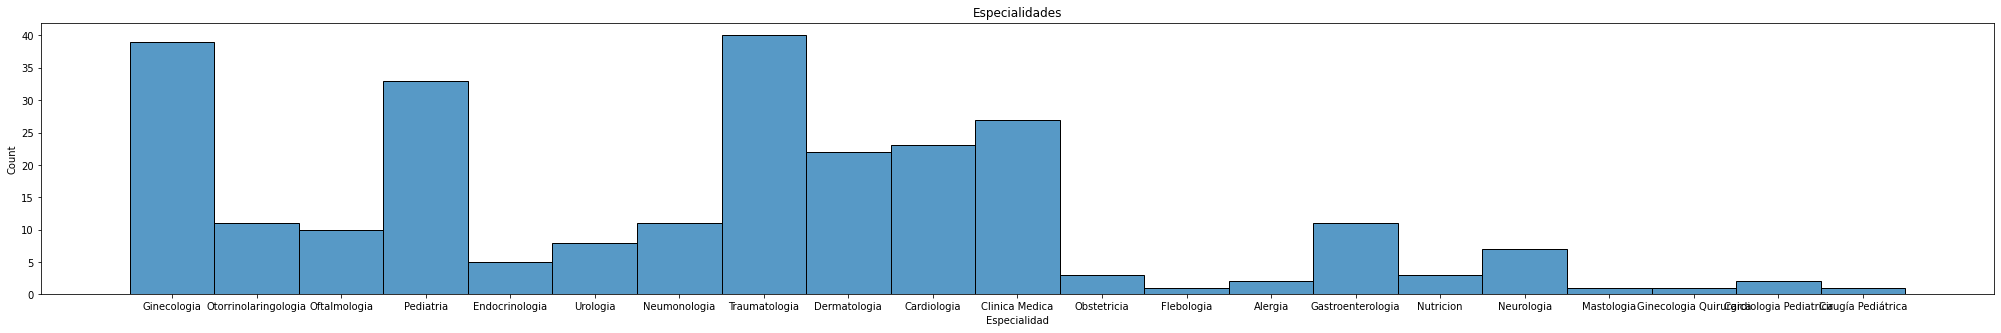

In [48]:
## Especialidades
fig = plt.figure(figsize=(35, 5))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Especialidades')

seaborn.histplot(data=df, x = 'Especialidad')

## Ejercicio 3: Generación

- Calcular la cantidad de mensajes promedio que implicó sacar un turno por mes, por hospital. Realice un gráfico con los resultados de estas cantidades. Interprete los resultados intentando esbozar hipótesis en el uso del bot. Si encuentra resultados destacados/anómalos sírvase de buscar en internet información sobre los hospitales para poder fortalecer su argumento.

- Calcular la cantidad de mensajes de pasaje de HH por mes, por hospital. Realice un gráfico con los resultados de estas cantidades. Interprete los resultados intentando esbozar hipótesis en el uso del bot. Si encuentra resultados destacados/anómalos sírvase de buscar en internet información sobre los hospitales para poder fortalecer su argumento.

### Cantidad de mensajes promedio para sacar un turno

Para calcular el número promedio de mensajes que implicó sacar un turno consideramos que
* Todos los mensajes tienen un campo 'Appointment' que indica si se obtuvo un turno o no

In [47]:
# ¿Cómo sabemos en que momento se sacó un turno? Con la columna Appointment.
# Parece haber solo 261 turnos

df.Appointment.dropna().value_counts()

0    20739
1      261
Name: Appointment, dtype: int64

In [ ]:
#vemos los mensajes que tienen Appointment == 1. Estos son los que consideramos como marcadores para indicar que se entregó un turno

confirmed = df [df.Appointment == 1]
confirmed.sample(5)

In [49]:
df[df.Appointment == 1 ][['To_anon', 'From_anon', 'Direction', 'Hospital']]

,To_anon,From_anon,Direction,Hospital
1,3146,2249,outbound-api,Carra
51,3469,2249,outbound-api,Carra
87,3358,2249,outbound-api,Carra
256,3554,2249,outbound-api,Carra
291,3253,2249,outbound-api,Carra
...,...,...,...,...
20035,2494,2624,outbound-api,CityBell
20070,1562,2624,outbound-api,CityBell
20486,6874,5047,outbound-api,Carra
20760,1894,2624,outbound-api,CityBell


In [57]:
cc.columns

Index(['Hospital', 'Tel_hospital', 'Body', 'Status', 'SentDate', 'Fecha',
       'Dia', 'Mes', 'Hora', 'Messages', 'Direction', 'Appointment_msp',
       'Appointment', 'Cancellation_msp', 'Cancelled', 'consult',
       'Consult_Appoint', 'fail_HH_sms', 'Fail_HH', 'achieve_HH', 'Got_HH',
       'Cupo', 'Full_turnos_obra_social', 'No_Relation', 'No_Correlation',
       'has_error', 'Error_Interno', 'has_error_501', 'Error_501',
       'falla_api_externo', 'Falla_Api_Externo', 'alta_dni', 'not_DNI',
       'issue_name', 'Issue_Name', 'ask_kunan', 'Ask_Kunan',
       'many_fallbacks_goto_hh', 'Many_Fallbacks_Goto_HH', 'From_anon',
       'To_anon', 'from_user', 'dt', 'tag'],
      dtype='object')

In [63]:
# Tomamos uno de los pares (To_anon, From_anon). En este caso, son mensajes del hospital hacia el usuario.
# Vemos que hay una interacción 
cc[((cc.To_anon == 3146) & (cc.From_anon == 2249)) | ((cc.To_anon == 2249) & (cc.From_anon == 3146)) ][['Body', 'Tel_hospital', 'Appointment', 'dt']].sort_values(by='dt')

,Body,Tel_hospital,Appointment,dt
23,"Hola, soy el asistente virtual de Clinica Carr...",whatsapp:+5493515266217,0,2022-01-02 20:40:28+00:00
21,"Necesito tu DNI, por favor.",whatsapp:+5493515266217,0,2022-01-02 20:40:34+00:00
18,"Necesito tu número de teléfono, por favor. Con...",whatsapp:+5493515266217,0,2022-01-02 20:40:46+00:00
19,Ya te encontrás registrado.,whatsapp:+5493515266217,0,2022-01-02 20:40:46+00:00
16,¡Muchas gracias! Tus datos son: \n XXXXXXXXX...,whatsapp:+5493515266217,0,2022-01-02 20:40:58+00:00
13,*Escribe el número de la opción* que quieres e...,whatsapp:+5493515266217,0,2022-01-02 20:41:02+00:00
14,Quedaron guardados tus datos.,whatsapp:+5493515266217,0,2022-01-02 20:41:02+00:00
11,*Escribe el número de la opción* que quieres e...,whatsapp:+5493515266217,0,2022-01-02 20:41:12+00:00
9,*Escribe el número de la opción* que quieres e...,whatsapp:+5493515266217,0,2022-01-02 20:41:19+00:00
7,*Escribe el número de la opción* que quieres e...,whatsapp:+5493515266217,0,2022-01-02 20:41:38+00:00


In [139]:
df[(df.From_anon == 4788) & (df.To_anon == 4613)]

,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,From_anon,To_anon,Especialidad
13526,Santa Fe,whatsapp:+5493424134455,¿Te puedo ayudar con algo más?,read,2022-03-01 10:02:05+00:00,2022-03-01,1,3,10,1,...,0,[],0,[],0,[],0,4788,4613,NaN
13527,Santa Fe,whatsapp:+5493424134455,No se encuentra registrado ese DNI en el sistema.,read,2022-03-01 10:02:05+00:00,2022-03-01,1,3,10,1,...,1,[],0,[],0,[],0,4788,4613,NaN
13533,Santa Fe,whatsapp:+5493424134455,"Necesito tu DNI, por favor.",read,2022-03-01 10:01:47+00:00,2022-03-01,1,3,10,1,...,0,[],0,[],0,[],0,4788,4613,NaN
13534,Santa Fe,whatsapp:+5493424134455,Tu sesión se ha reinciado por tiempo de inacti...,read,2022-03-01 10:01:47+00:00,2022-03-01,1,3,10,1,...,0,[],0,[],0,[],0,4788,4613,NaN


In [180]:
# Agrupamos los mensajes por Hospital  y mes y vemos las cantidades
group = df.groupby(['Hospital', 'Mes', 'From_anon', 'To_anon'])[['Hospital', 'Mes', 'Appointment', 'Messages', 'From_anon', 'To_anon' ,'Direction','Body','SentDate']]
msgs_por_grupo = group.count()

msgs_por_grupo


Hospital  Mes  Appointment  Messages  \
Hospital Mes From_anon To_anon                                         
Carra    1   2087      2121            1    1            1         1   
             2115      2121           15   15           15        15   
             2127      2121           11   11           11        11   
             2128      2121            7    7            7         7   
             2156      2121            3    3            3         3   
...                                  ...  ...          ...       ...   
Santa Fe 2   3293      3174           11   11           11        11   
         3   4788      4613            4    4            4         4   
                       4624            2    2            2         2   
             4794      4607            2    2            2         2   
             4805      4607            2    2            2         2   

                                From_anon  To_anon  Direction  Body  SentDate  
Hospital Mes From_anon To_anon                                                 
Carra    1   2087      2121             1        1          1     1         1  
             2115      2121            15       15         15    15        15  
             2127      2121            11       11         11    11        11  
             2128      2121             7        7          7     7         7  
             2156      2121             3        3          3     3         3  
...                                   ...      ...        ...   ...       ...  
Santa Fe 2   3293      3174            11       11         11    11        11  
         3   4788      4613             4        4          4     4         4  
                       4624             2        2          2     2         2  
             4794      4607             2        2          2     2         2  
             4805      4607             2        2          2     2         2  

[1593 rows x 9 columns]

In [181]:
ends_with_turno = group.filter(lambda data: data.Appointment.sum() > 0)


¿Cómo se ven las respuestas del bot, cuando una interacción tiene un turno asignado?

In [ ]:
e = ends_with_turno
ends_with_turno [(e.From_anon == 3464) & (e.To_anon == 3633)].sort_values(by='SentDate', ascending= True)


In [213]:
g2 = ends_with_turno.groupby(['Hospital', 'Mes'])[['Messages']]
g2.count()


10

In [197]:
g2.apply(lambda d: d.Messages.sum()/d.Messages.count())

Hospital            Mes  From_anon  To_anon
Carra               1    2249       2005       1.0
                                    2006       1.0
                                    2700       1.0
                                    2718       1.0
                                    2756       1.0
                                              ... 
Salud Consultorios  3    5048       5504       1.0
                                    5527       1.0
                                    5585       1.0
                                    5695       1.0
                                    7114       1.0
Length: 225, dtype: float64

In [84]:
# Sabemos que el numero de mensajes 
group.apply(lambda g : g.Appointment.sum() / g.Messages.count())

Hospital            Mes
Carra               1      0.016733
                    2      0.017873
                    3      0.016010
CityBell            1      0.000000
                    2      0.013375
                    3      0.009914
Desarrollo          2      0.000000
Los Cedros          1      0.000000
                    2      0.010191
                    3      0.003356
Salud Consultorios  1      0.011050
                    2      0.011236
                    3      0.009362
Santa Fe            2      0.000000
                    3      0.000000
dtype: float64

In [37]:
# Consideramos unicamente los mensajes de los pacientes
inbound = df [(df.Direction != 'inbound')]

def got_appointment(data, hospital):
  print(f"{hospital}: {len(data[data.Appointment == 1])} turnos")


for h in inbound.Hospital.unique():
  hh = inbound [inbound.Hospital == h]
  got_appointment(hh, h)




Carra: 99 turnos
Los Cedros: 11 turnos
Salud Consultorios: 35 turnos
CityBell: 116 turnos
Desarrollo: 0 turnos
Santa Fe: 0 turnos


In [107]:
df.groupby(['From_anon', 'To_anon'])[['Hospital', 'Direction', 'From_anon', 'To_anon']].head()

,Hospital,Direction,From_anon,To_anon
0,Carra,outbound-api,2249,3146
1,Carra,outbound-api,2249,3146
2,Carra,inbound,3356,2121
3,Carra,outbound-api,2249,3146
4,Carra,inbound,3356,2121
...,...,...,...,...
20992,CityBell,outbound-api,2624,841
20993,CityBell,inbound,879,2519
20997,CityBell,inbound,879,2519
20998,CityBell,outbound-api,2624,3108


In [113]:
# Agrupamos los mensajes por hospital y mes

df_g = df.groupby(['Hospital', 'Mes'])


df_g



## Ejercicio 4: Investigación

Planteénse como grupo al menos una pregunta de investigación concreta que crean que el dataset dado puede responder.